In [1]:
from sympy import *
#from scipy.optimize import minimize, NonlinearConstraint
import numpy as np
import matplotlib.pyplot as plt



# define relevent symbols 
#     _u = u^n, _zeta = \zeta^n
#     U1 = \bar{u}^{n+1/3}, ZETA1= \bar{\zeta}^{n+1/3}
#     U2 = \bar{u}^{n+1/2}, ZETA2= \bar{\zeta}^{n+1/2}
#     u = u^{n+1}, zeta = \zeta^{n+1}
_u, _zeta = symbols("u^n \zeta^n")
lam, alpha, beta1, beta2, beta3 = \
    symbols("lambda alpha beta_1 beta_2 beta_3")

# define time-stepping scheme
ZETA1 = _zeta - (I*alpha/3) * _u
U1 = _u - (I*alpha/3) * ( beta1*ZETA1 + (1-beta1)*_zeta )

ZETA2 = _zeta - (I*alpha/2) * U1 
U2 = _u - (I*alpha/2) * ( beta2*ZETA2 + (1-beta2)*_zeta )

zeta = _zeta - I*alpha*U2
u = _u - I*alpha * ( beta3*zeta + (1-2*beta3)*ZETA2 + beta3*_zeta )

# simplify the expressions for zeta and u 
zeta  = zeta.simplify()
u = u.simplify()

# create the amplification matrix G
_w = [_zeta, _u]
w = [zeta, u]
G, _ = linear_eq_to_matrix(w, _w)

# characteristic polynomial
p = G.charpoly(lam).as_expr()
#print(nsimplify(p))

# just do a brute-force search in parameter space, and
# build up a list of "good" candidates
# once we have them, rank candidates by a_max estimate

#val1 = np.linspace(0., 1., 21)
#val2 = np.linspace(0., 1., 21)
#val3 = np.linspace(0., .5, 21)

val1 = np.linspace(.2, .5, 16)
val2 = np.linspace(.4, .6, 16)
val3 = np.linspace(.2, .5, 16)

soln = []; TINY = 1.0E-12; ONE = 1. + TINY
for b1 in val1:
    print("Doing beta_1 =", b1)
    for b2 in val2:
        for b3 in val3:
            optP = p.subs([(beta1, b1), (beta2, b2), (beta3, b3)])

            solM = solve(optP.subs([(lam, -1.0)]), alpha, 
                         simplify=False, 
                         rational=False)
            solP = solve(optP.subs([(lam, +1.0)]), alpha, 
                         simplify=False, 
                         rational=False)

            minM = np.inf; numM = 0
            for root in solM:
                if im(root) == 0 and re(root) != 0:
                    numM = numM + 1 
                    minM = min(minM, abs(root))

            # require >=1 real root for lambda = -1
            if (numM <= 0): continue

            minP = np.inf; numP = 0
            for root in solP:
                if im(root) == 0 and re(root) != 0:
                    numP = numP + 1 
                    minP = min(minP, abs(root))

            # require >=1 real root for lambda = +1
            if (numP <= 0): continue

            keep = min(minM, minP)

            # require root is stable at small alpha
            eigv = solve(optP.subs([(alpha, pi / 4.0)]), lam, 
                         simplify=False, 
                         rational=False)

            if (abs(eigv[0].evalf())) > ONE: continue
            if (abs(eigv[1].evalf())) > ONE: continue

            # require pure real root at alpha = +pi
            eigv = solve(optP.subs([(alpha, pi / 1.0)]), lam, 
                         simplify=False, 
                         rational=False)

            if (abs(im(eigv[0])) >= TINY): continue
            if (abs(im(eigv[1])) >= TINY): continue

            # require -ve. real root at alpha = +pi
            if (    re(eigv[0] ) >= TINY): continue
            if (    re(eigv[1] ) >= TINY): continue

            # if we've got this far, keep candidate!
            if (keep < np.inf):
                soln.append((keep, b1, b2, b3))


soln = sorted(
    soln, key=lambda lx: lx[0], reverse=True)

soln = np.asarray(soln, dtype=np.float32)
soln = soln[soln[:, 0] >= 3., :]


Doing beta_1 = 0.2
Doing beta_1 = 0.22
Doing beta_1 = 0.24000000000000002
Doing beta_1 = 0.26
Doing beta_1 = 0.28
Doing beta_1 = 0.30000000000000004
Doing beta_1 = 0.32
Doing beta_1 = 0.34
Doing beta_1 = 0.36
Doing beta_1 = 0.38
Doing beta_1 = 0.4
Doing beta_1 = 0.42000000000000004
Doing beta_1 = 0.44
Doing beta_1 = 0.46
Doing beta_1 = 0.48000000000000004
Doing beta_1 = 0.5


<IPython.core.display.Javascript object>


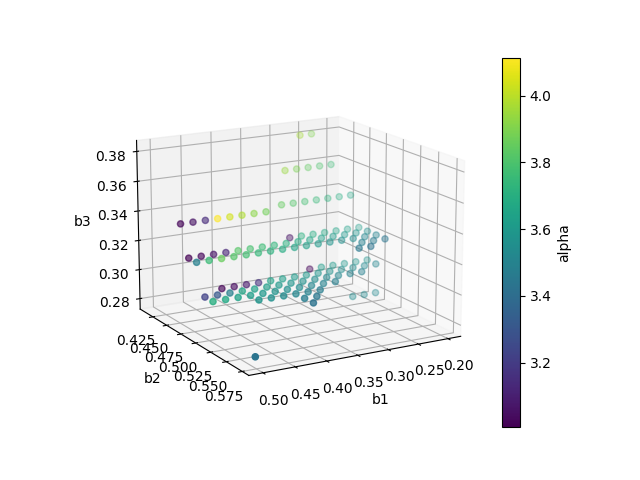

a_max, b1, b2, b3:
[[4.113936   0.44       0.45333335 0.34      ]
 [4.039493   0.42       0.45333335 0.34      ]
 [3.9765117  0.4        0.45333335 0.34      ]
 [3.962998   0.26       0.41333333 0.38      ]
 [3.9425182  0.3        0.42666668 0.36      ]
 [3.9216785  0.38       0.45333335 0.34      ]
 [3.8995502  0.24       0.41333333 0.38      ]
 [3.8905241  0.28       0.42666668 0.36      ]
 [3.8729835  0.36       0.45333335 0.34      ]
 [3.858343   0.46       0.48       0.32      ]
 [3.8478537  0.32       0.44       0.34      ]
 [3.8437936  0.26       0.42666668 0.36      ]
 [3.820819   0.42       0.46666667 0.32      ]
 [3.8172088  0.44       0.48       0.32      ]
 [3.8125188  0.3        0.44       0.34      ]
 [3.8013055  0.24       0.42666668 0.36      ]
 [3.7891161  0.4        0.46666667 0.32      ]
 [3.7796447  0.42       0.48       0.32      ]
 [3.7796447  0.28       0.44       0.34      ]
 [3.7623181  0.22       0.42666668 0.36      ]
 [3.7594717  0.38       0.46666667 0.32  

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
x = []; y = []; z = []; a = []
for sol in soln:
    x.append(sol[1])
    y.append(sol[2])
    z.append(sol[3])
    a.append(sol[0])
# END for
sc = ax.scatter(x, y, z, c=a)
fig.colorbar(sc, label=alpha)
ax.set_xlabel('b1')
ax.set_ylabel('b2')
ax.set_zlabel('b3')
plt.savefig('betas.png')

# quasi-sensible list of solutions
np.set_printoptions(threshold=2**16)
print("a_max, b1, b2, b3:")
print(soln)

print("MEAN parameters:")
print(np.mean(soln, axis=0))

plt.show()